<a href="https://colab.research.google.com/github/IsmoilDev7/Diabetes_diagnosis_Data_science/blob/main/Diabetes_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#We determine the number of values in the dataset that have diabetes accuracy (1) and accuracy (0).

In [5]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268




> Добавить блок с цитатой

#We can check the degree of correlation between rows using the corr() function.

In [6]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap = 'coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#corrwith simple method

In [7]:
df.corrwith(df['Outcome']).abs().sort_values(ascending = False)

,0
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


#We are preparing machine learning

In [8]:
X = df.drop('Outcome', axis = 1).values
y = df['Outcome'].values

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

#ML

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

#k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 17) #k = 17
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=17)

In [26]:
y_predict = knn.predict(X_test)

#Evaluation
Jaccard index

In [27]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predict)

np.float64(0.4492753623188406)

#Confusion matrix

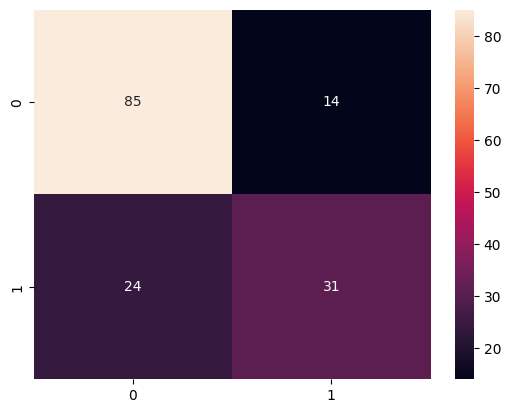

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

In [29]:
confusion_matrix(y_test, y_predict)

array([[85, 14],
       [24, 31]])

#Precision, recall, F1

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)
print('Accuracy: ', accuracy)

Precision:  0.6888888888888889
Recall:  0.5636363636363636
F1:  0.62
Accuracy:  0.7532467532467533


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        99
           1       0.69      0.56      0.62        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



#Finding the best k using ((n_neighbors=5) # k-value)
for

> Добавить блок с цитатой



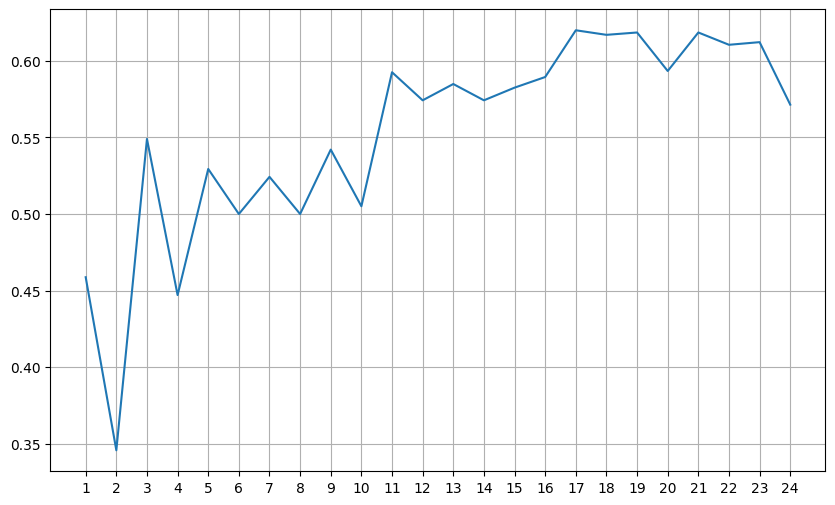

In [32]:
f1 = []

for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize = (10, 6))
plt.plot(range(1, 25), f1)
plt.xticks(range(1, 25))
plt.grid()
plt.show()

#Grid search

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [34]:
knn_gscv.cv_results_
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 15, 18, 22, 21, 17, 16, 20, 19, 14,  9,  4, 11,  3, 12,  1,
        6,  2,  8,  5, 10,  7, 13], dtype=int32)

In [35]:
knn_gscv.best_params_

{'n_neighbors': np.int64(17)}

In [36]:
knn_gscv.best_score_

np.float64(0.7669892199303965)

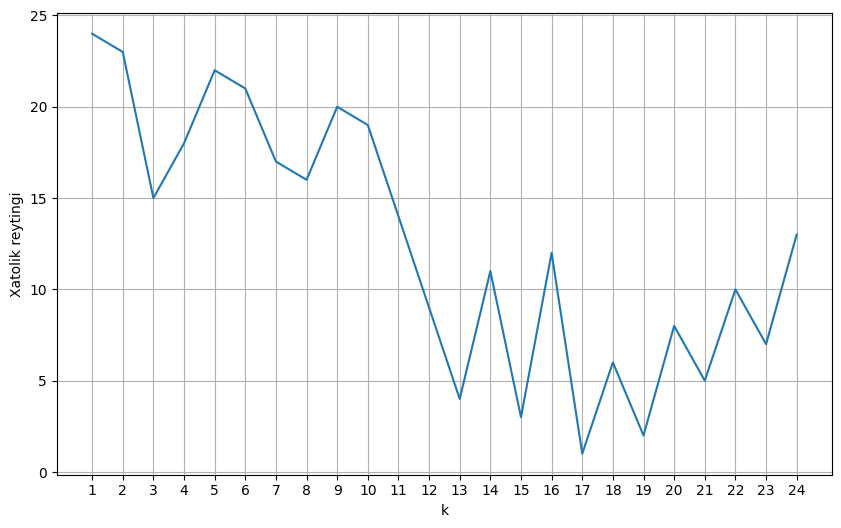

In [37]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()